Complete the code whereever you see the following sign in next cell:

In [ ]:
###### your code ######
#===================================

In [1]:
#at first, we import what ever we need.
import numpy as np
import gzip
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC,LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [2]:
#now, lets load our data. first we load the training data and their labels.
#reading Training images
Ti = open("train-images-idx3-ubyte.gz","rb")
ti = Ti.read()
a = np.frombuffer(gzip.decompress(ti), dtype=np.uint8).copy()
Train_images = a[0x10:].reshape((-1, 28, 28))
#reading Training labels
Tl = open("train-labels-idx1-ubyte.gz","rb")
tl = Tl.read()
a = np.frombuffer(gzip.decompress(tl), dtype=np.uint8).copy()
Train_labels = a[8:]

In [3]:
#by utilizing the above cell, load the test data and their labels.
###### your code ######
#===================================
#reading Test images
Tei = open("t10k-images-idx3-ubyte.gz","rb")
tei = Tei.read()
a = np.frombuffer(gzip.decompress(tei), dtype=np.uint8).copy()
Test_images = a[0x10:].reshape((-1, 28, 28))

#reading Test labels
Tel = open("t10k-labels-idx1-ubyte.gz","rb")
tel = Tel.read()
a = np.frombuffer(gzip.decompress(tel), dtype=np.uint8).copy()
Test_labels = a[8:]

In [4]:
#lets test that our reading cells worked fine (we must have 60000 images with size of (28,28) as the training images and 60000 scalar labels,10000 images for test and their 10000 coresponding labels.)
print("Training images shape:", Train_images.shape)
print("Training labels shape:", Train_labels.shape)
print("Test images shape:", Test_images.shape)
print("Test labels shape:", Test_labels.shape)


Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


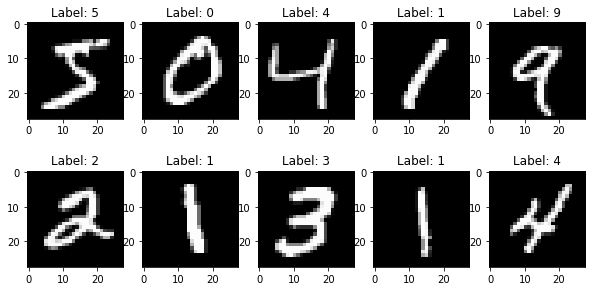

In [5]:
#now lets see some images with their labels(from Training Set)
#in this cell you need to visualize some(more than two) of our train images and their labels, just like the present output
###### your code ######
#===================================
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(Train_images[i * 5 + j], cmap='gray')
        ax[i, j].set_title(f"Label: {Train_labels[i * 5 + j]}")
plt.show()

In [6]:
#reducing the 3d dims to 2d,for making our Data sets useful for our SVM training and evaluations.
#you need to transform your images to vectors, so your model can work with them.
###### your code ######
#===================================
X_train = Train_images.reshape(len(Train_images), -1)
X_test = Test_images.reshape(len(Test_images), -1)

y_train = Train_labels.flatten()
y_test = Test_labels.flatten()


In [7]:
#checking our new dimensionality
#after the above transformation, we should have a shape of (60000,784) for train dataset and a shape of (10000,784) for test dataset
###### your code ######
#===================================
print("Train images shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Test images shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Train images shape: (60000, 784)
Train labels shape: (60000,)
Test images shape: (10000, 784)
Test labels shape: (10000,)


Precision:  0.9791973966593345
Recall:  0.9790919842945065
F1 measure:  0.9791298259748042


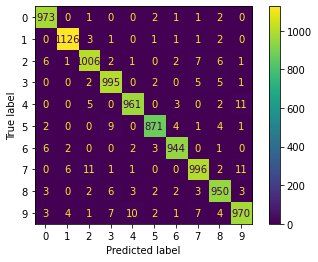

In [9]:
#in this cell, use an SVM with RBF kernel that trains on training dataset and predicts test labels.
# do you need StandardScaler()? if your answer is Yes, then feel free and use it but if you are more confident with the answer 'No', dont use it.
#after the prediction, display the confusion matrix and calculate three metrics(precision,recall and F1 measure)
###### your code ######
#===================================
svm_rbf = SVC(kernel='rbf')

svm_rbf.fit(X_train, y_train)

y_pred = svm_rbf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 measure: ", f1)


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Precision:  0.8833955997702377
Recall:  0.8717941293489029
F1 measure:  0.8735093705204005


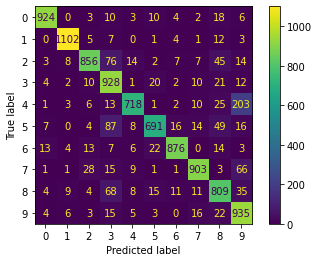

In [12]:
#in this cell, use an SVM with Linear kernel that trains on training dataset and predicts test labels.
# do you need StandardScaler()? if your answer is Yes, then feel free and use it but if you are more confident with the answer 'No', dont use it.
#after the prediction, display the confusion matrix and calculate three metrics(precision,recall and F1 measure)
###### your code ######
#===================================
from sklearn.svm import LinearSVC
# svm_linear = SVC(kernel='linear')
svm_linear =  LinearSVC(random_state=0, tol=1e-5)

svm_linear.fit(X_train, y_train)

y_pred = svm_linear.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 measure: ", f1)

Hyper-parameter Tuning

In [ ]:
#in this cell, use a gridsearch method to optimize the model via findong the best hyper-parameter settings.
#feel free to use any sort of trick to shorten the running time.
#consider the SVM with RBF kernel and search for two hyper-parameter (C and gamma)
#for any of these hyper-parameters consider 2 or 3 values.
#finnaly, print out the best params you found.
###### your code ######
#===================================
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=3)

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)